In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 12, 7
sns.set_style("dark")

In [3]:
df = pd.read_csv('data/catalog.csv').dropna()

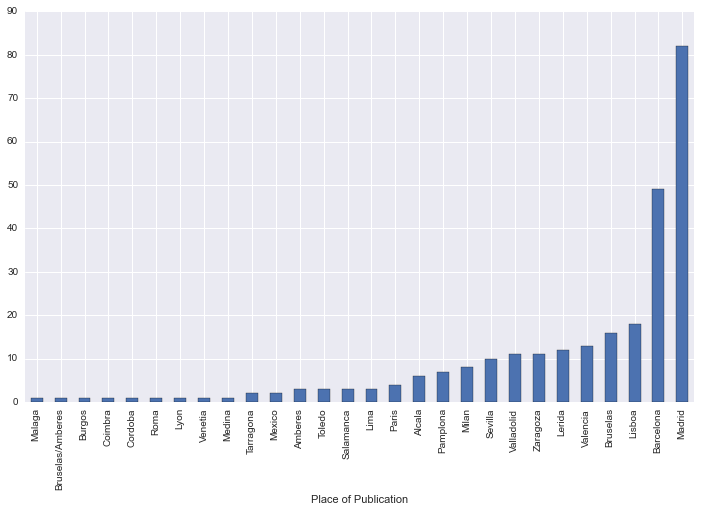

In [4]:
places = df.groupby("Place of Publication").size()
places.sort()
places.plot(kind="bar")

In [5]:
places

Place of Publication
Malaga               1
Bruselas/Amberes     1
Burgos               1
Coimbra              1
Cordoba              1
Roma                 1
Lyon                 1
Venetia              1
Medina               1
Tarragona            2
Mexico               2
Amberes              3
Toledo               3
Salamanca            3
Lima                 3
Paris                4
Alcala               6
Pamplona             7
Milan                8
Sevilla             10
Valladolid          11
Zaragoza            11
Lerida              12
Valencia            13
Bruselas            16
Lisboa              18
Barcelona           49
Madrid              82
dtype: int64

In [6]:
map_key = {"Milan": 12591813, "Bruselas": 22525998, "Amberes": 7153308, "Cordoba": 12602098,
       'Lerida': 12602126, 'Madrid': 12578024, 'Valencia': 12602139 , 'Sevilla': 12602104 , 'Toledo': 12602114,
       'Lisboa': 2346573, 'Tarragona': 12602127 , 'Zaragoza':12602107 , 'Alcala':12578024,
       'Pamplona': 12578026 , 'Coimbra': 2346567, 'Barcelona': 12602124, 'Valladolid': 12602122,
       'Malaga': 12602102 , 'Burgos': 12602116, 'Roma': 12591802, 'Lyon': 12597185, 'Venetia': 12591860,
        'Medina': 12602122 , 'Salamanca': 12602119 , 'Paris': 12597155}

In [7]:
import csv
def write_csv(d, map_key, name):
    count = {}
    for k, v in d.items():
        id = map_key.get(k, "")
        if id:
            count.setdefault(id, 0)
            count[id] += v
    with open(name, "w") as f:
        writer = csv.writer(f)
        writer.writerow(["id", "count"])
        for k, v in count.items():
            writer.writerow([k, v])

In [8]:
write_csv(places.to_dict(), map_key, 'maps/western_europe_data/tsv/editions.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'maps/western_europe_data/tsv/editions.csv'

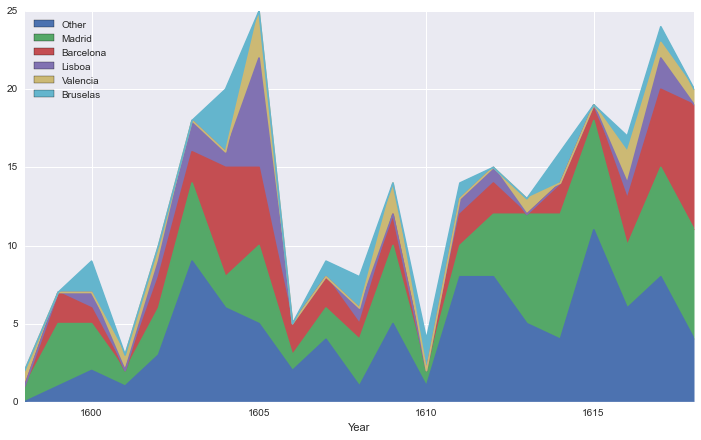

In [9]:
places_by_year = df.groupby(["Place of Publication", "Year"]).size()
other = places_by_year.drop(["Madrid", "Barcelona", "Bruselas", "Lisboa", "Valencia"], axis=0)
other = other.unstack().fillna(0).sum()
top_places_year = pd.DataFrame(
    {"Other": other,
     "Madrid": places_by_year.ix["Madrid"],
     "Barcelona": places_by_year.ix["Barcelona"],
     "Lisboa": places_by_year.ix["Lisboa"],
     "Valencia": places_by_year.ix["Valencia"],
     "Bruselas": places_by_year.ix["Bruselas"]}, columns=["Other", "Madrid", "Barcelona", "Lisboa", "Valencia", "Bruselas"]).fillna(0)
sns.set_style("dark")
top_places_year.plot(kind="area")

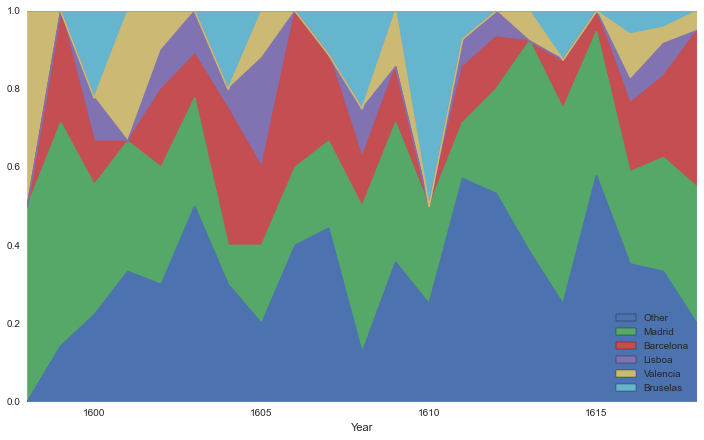

In [10]:
places_by_year = df.groupby(["Place of Publication", "Year"]).size()
other = places_by_year.drop(["Madrid", "Barcelona", "Bruselas", "Lisboa", "Valencia"], axis=0)
other = other.unstack().fillna(0).sum()
years = df.groupby("Year").size()
top_places_year = pd.DataFrame(
    {"Other": other.divide(years),
     "Madrid": places_by_year.ix["Madrid"].divide(years),
     "Barcelona": places_by_year.ix["Barcelona"].divide(years),
     "Lisboa": places_by_year.ix["Lisboa"].divide(years),
     "Valencia": places_by_year.ix["Valencia"].divide(years),
     "Bruselas": places_by_year.ix["Bruselas"].divide(years)}, columns=["Other", "Madrid", "Barcelona", "Lisboa", "Valencia", "Bruselas"]).fillna(0)
sns.set_style("dark")
top_places_year.plot(kind="area")

In [11]:
df.groupby("Year").size()

Year
1598     2
1599     7
1600     9
1601     3
1602    10
1603    18
1604    20
1605    25
1606     5
1607     9
1608     8
1609    14
1610     4
1611    14
1612    15
1613    13
1614    16
1615    19
1616    17
1617    24
1618    20
dtype: int64

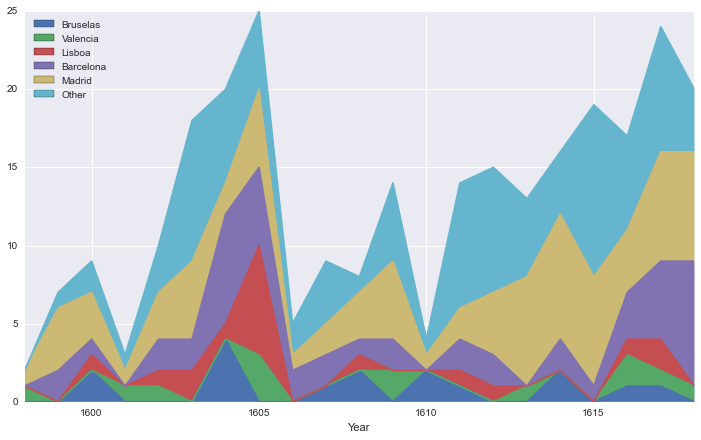

In [12]:
top_places_year = pd.DataFrame(
    {"Other": other,
     "Madrid": places_by_year.ix["Madrid"],
     "Barcelona": places_by_year.ix["Barcelona"],
     "Lisboa": places_by_year.ix["Lisboa"],
     "Valencia": places_by_year.ix["Valencia"],
     "Bruselas": places_by_year.ix["Bruselas"]}, columns=["Bruselas", "Valencia", "Lisboa", "Barcelona", "Madrid", "Other"]).fillna(0)
sns.set_style("dark")
top_places_year.plot(kind="area")

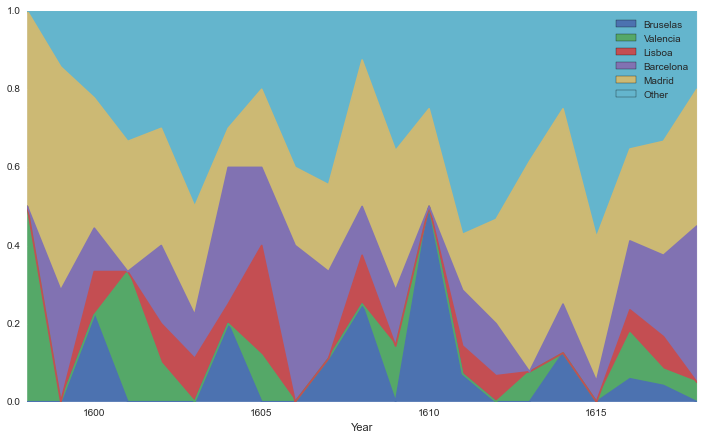

In [13]:
top_places_year = pd.DataFrame(
    {"Other": other.divide(years),
     "Madrid": places_by_year.ix["Madrid"].divide(years),
     "Barcelona": places_by_year.ix["Barcelona"].divide(years),
     "Lisboa": places_by_year.ix["Lisboa"].divide(years),
     "Valencia": places_by_year.ix["Valencia"].divide(years),
     "Bruselas": places_by_year.ix["Bruselas"].divide(years)}, columns=["Bruselas", "Valencia", "Lisboa", "Barcelona", "Madrid", "Other"]).fillna(0)
sns.set_style("dark")
top_places_year.plot(kind="area")
plt.savefig("img/cities_year_area.png")

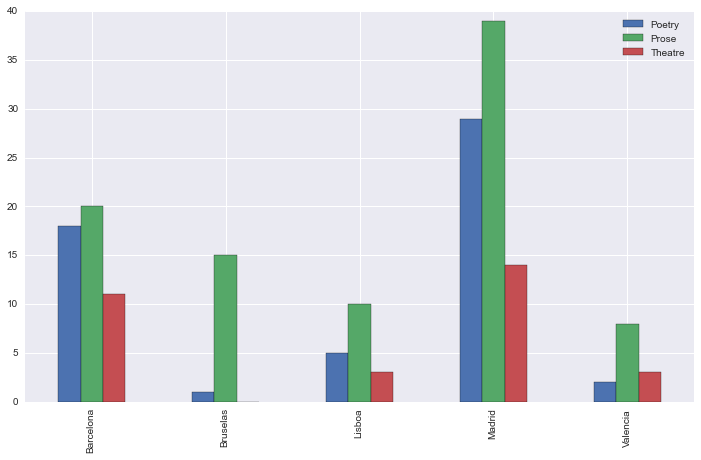

In [14]:
top_cities = df[(df["Place of Publication"] == "Madrid") | (df["Place of Publication"] == "Barcelona") |
                (df["Place of Publication"] == "Lisboa") | (df["Place of Publication"] == "Valencia") |
                (df["Place of Publication"] == "Bruselas")]
places_by_year = top_cities.groupby(["Genre", "Place of Publication"]).size()
top_places_year = pd.DataFrame(
    {"Prose": places_by_year.ix["Prose"],
     "Theatre": places_by_year.ix["Theatre"],
     "Poetry": places_by_year.ix["Poetry"]}).fillna(0)
top_places_year.plot(kind="bar")

(0, 1.0)

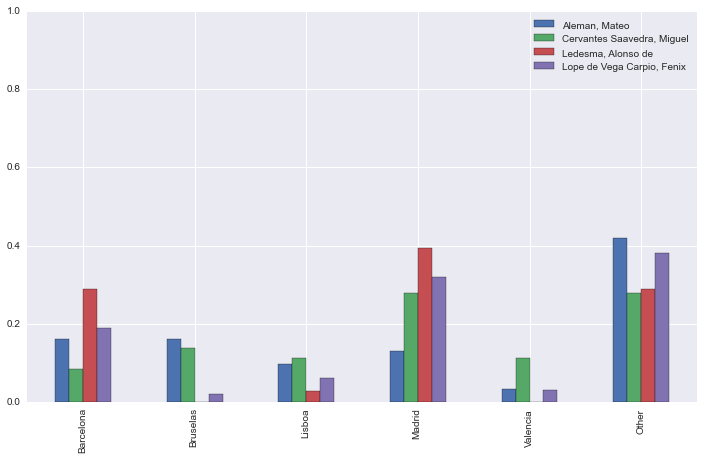

In [15]:
top_cities_authors = top_cities[(top_cities["Author"] == "Lope de Vega Carpio, Fenix") |
                                (top_cities["Author"] == "Ledesma, Alonso de") |
                                (top_cities["Author"] == "Cervantes Saavedra, Miguel") |
                                (top_cities["Author"] == "Aleman, Mateo")]
places_by_auth = top_cities_authors.groupby(["Author", "Place of Publication"]).size()
top_places_auth = pd.DataFrame(
    {"Lope de Vega Carpio, Fenix": places_by_auth.ix["Lope de Vega Carpio, Fenix"].apply(lambda x: x / 100.0),
     "Ledesma, Alonso de": places_by_auth.ix["Ledesma, Alonso de"].apply(lambda x: x / 38.0),
     "Cervantes Saavedra, Miguel": places_by_auth.ix["Cervantes Saavedra, Miguel"].apply(lambda x: x / 36.0),
     "Aleman, Mateo": places_by_auth.ix["Aleman, Mateo"].apply(lambda x: x / 31.0)}).fillna(0)
s = top_places_auth.sum()

s = s.apply(lambda x: 1 - x)

trans = top_places_auth.T
trans["Other"] = s.values
top_places_auth = trans.T
top_places_auth.plot(kind="bar")
# Here let's look at % of total output by city
plt.ylim(0, 1.0)

(0, 1.0)

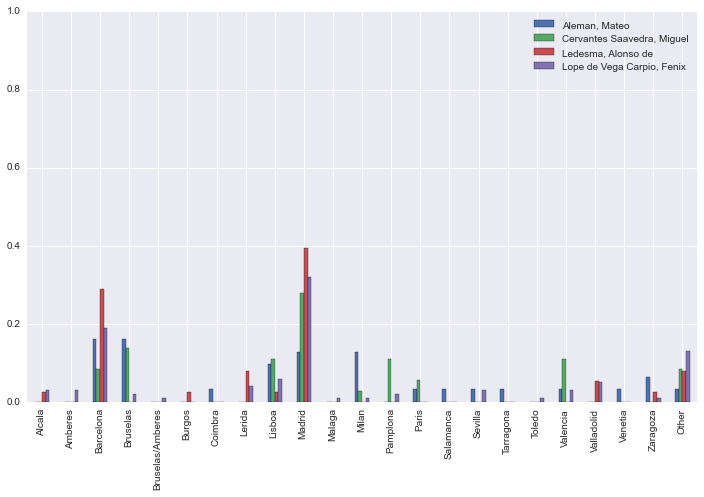

In [16]:
top_cities_authors = df[(df["Author"] == "Lope de Vega Carpio, Fenix") |
                                (df["Author"] == "Ledesma, Alonso de") |
                                (df["Author"] == "Cervantes Saavedra, Miguel") |
                                (df["Author"] == "Aleman, Mateo")]
places_by_auth = top_cities_authors.groupby(["Author", "Place of Publication"]).size()
top_places_auth = pd.DataFrame(
    {"Lope de Vega Carpio, Fenix": places_by_auth.ix["Lope de Vega Carpio, Fenix"].apply(lambda x: x / 100.0),
     "Ledesma, Alonso de": places_by_auth.ix["Ledesma, Alonso de"].apply(lambda x: x / 38.0),
     "Cervantes Saavedra, Miguel": places_by_auth.ix["Cervantes Saavedra, Miguel"].apply(lambda x: x / 36.0),
     "Aleman, Mateo": places_by_auth.ix["Aleman, Mateo"].apply(lambda x: x / 31.0)}).fillna(0)
s = top_places_auth.sum()

s = s.apply(lambda x: 1 - x)

trans = top_places_auth.T
trans["Other"] = s.values
top_places_auth = trans.T
top_places_auth.plot(kind="bar")
# Here let's look at % of total output by city
plt.ylim(0, 1.0)

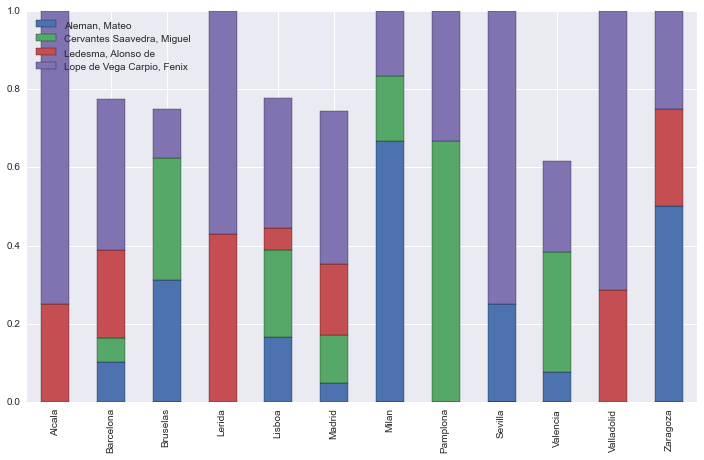

In [17]:
extended_top_cities = df[(df["Place of Publication"] == "Madrid") | (df["Place of Publication"] == "Barcelona") |
                         (df["Place of Publication"] == "Lisboa") | (df["Place of Publication"] == "Valencia") |
                         (df["Place of Publication"] == "Bruselas") | (df["Place of Publication"] == "Lerida") |
                         (df["Place of Publication"] == "Valladolid") | (df["Place of Publication"] == "Zaragoza") |
                         (df["Place of Publication"] == "Sevilla") | (df["Place of Publication"] == "Milan") |
                        (df["Place of Publication"] == "Pamplona") | (df["Place of Publication"] == "Alcala")]
top_cities_authors = extended_top_cities[(extended_top_cities["Author"] == "Lope de Vega Carpio, Fenix") |
                                (extended_top_cities["Author"] == "Ledesma, Alonso de") |
                                (extended_top_cities["Author"] == "Cervantes Saavedra, Miguel") |
                                (extended_top_cities["Author"] == "Aleman, Mateo")]
places_by_auth = top_cities_authors.groupby(["Author", "Place of Publication"]).size()
other_places_by_auth = top_cities.groupby(["Author", "Place of Publication"]).size()
other = other_places_by_auth.drop(["Lope de Vega Carpio, Fenix", "Ledesma, Alonso de",
                             "Cervantes Saavedra, Miguel", "Aleman, Mateo"], axis=0)
other = other.unstack().fillna(0).sum()
top_places_auth = pd.DataFrame(
    {"Other": other,
     "Lope de Vega Carpio, Fenix": places_by_auth.ix["Lope de Vega Carpio, Fenix"],
     "Ledesma, Alonso de": places_by_auth.ix["Ledesma, Alonso de"],
     "Cervantes Saavedra, Miguel": places_by_auth.ix["Cervantes Saavedra, Miguel"],
     "Aleman, Mateo": places_by_auth.ix["Aleman, Mateo"]}).fillna(0)

sums = top_places_auth.sum(axis=1)
stacked_places = top_places_auth.divide(sums, axis=0)
stacked_places.drop("Other", axis=1).plot(kind="bar", stacked=True)
plt.ylim(0, 1.0)
plt.savefig("img/stacked_auth_places.png")

In [18]:
texts = df.groupby("Title").size()
texts.sort()
texts.tail()

Title
El ingenioso hidalgo don Quixote de la Mancha      11
Arcadia                                            12
Segunda parte de la vida de Guzman de Alfarache    15
Conceptos espirituales Parte I                     20
Guzman de Alfarache                                21
dtype: int64

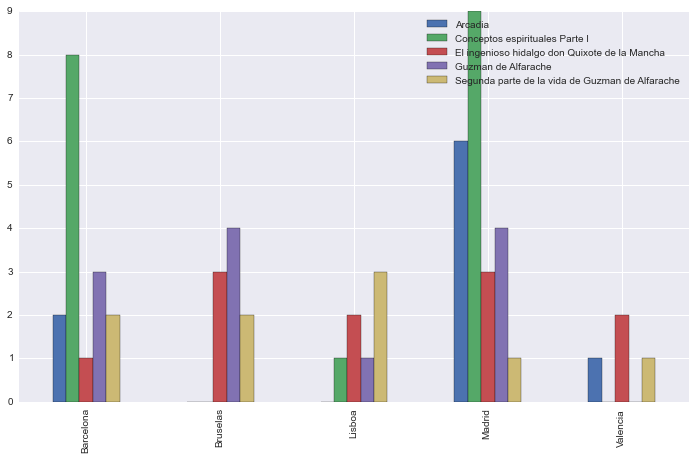

In [19]:
top_cities_authors = top_cities[(top_cities["Title"] == "Guzman de Alfarache") |
                                (top_cities["Title"] == "Conceptos espirituales Parte I") |
                                (top_cities["Title"] == "Segunda parte de la vida de Guzman de Alfarache") |
                                (top_cities["Title"] == "Arcadia") |
                                (top_cities["Title"] == "El ingenioso hidalgo don Quixote de la Mancha")]
places_by_auth = top_cities_authors.groupby(["Title", "Place of Publication"]).size()
top_places_auth = pd.DataFrame(
    {"Guzman de Alfarache": places_by_auth.ix["Guzman de Alfarache"],
     "Conceptos espirituales Parte I": places_by_auth.ix["Conceptos espirituales Parte I"],
     "Segunda parte de la vida de Guzman de Alfarache": places_by_auth.ix["Segunda parte de la vida de Guzman de Alfarache"],
     "Arcadia": places_by_auth.ix["Arcadia"],
     "El ingenioso hidalgo don Quixote de la Mancha": places_by_auth.ix["El ingenioso hidalgo don Quixote de la Mancha"]}).fillna(0)
top_places_auth.plot(kind="bar")

In [20]:
df.groupby("Genre").size()

Genre
Poetry      87
Prose      142
Theatre     43
dtype: int64

/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


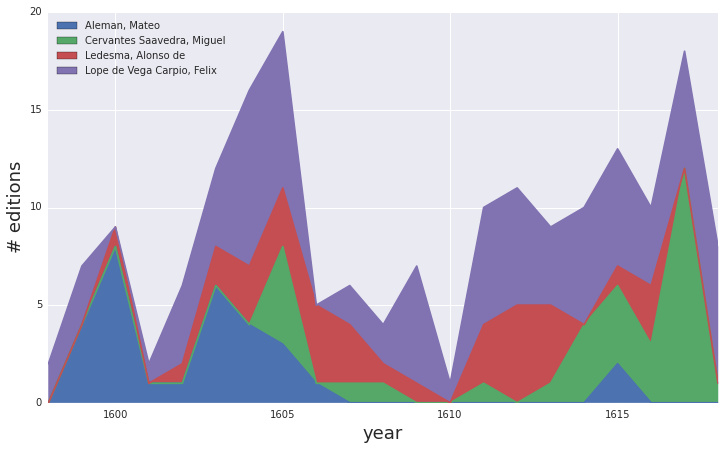

In [21]:
font = {'family' : 'normal',
        'size'   : 22}

plt.rc('font', **font)
author_by_year = df.groupby(["Author", "Year"]).size()
other = author_by_year.drop(["Lope de Vega Carpio, Fenix", "Ledesma, Alonso de",
                             "Cervantes Saavedra, Miguel", "Aleman, Mateo"], axis=0)
other = other.unstack().fillna(0).sum()
top_authors_year = pd.DataFrame(
    {
     "Lope de Vega Carpio, Felix": author_by_year.ix["Lope de Vega Carpio, Fenix"],
     "Ledesma, Alonso de": author_by_year.ix["Ledesma, Alonso de"],
     "Cervantes Saavedra, Miguel": author_by_year.ix["Cervantes Saavedra, Miguel"],
     "Aleman, Mateo": author_by_year.ix["Aleman, Mateo"]}).fillna(0)
top_authors_year.plot(kind="area")
plt.ylabel('# editions', size=18)
plt.xlabel('year', size=18)
plt.savefig("img/article/figure8.eps", format='eps', dpi=1000)

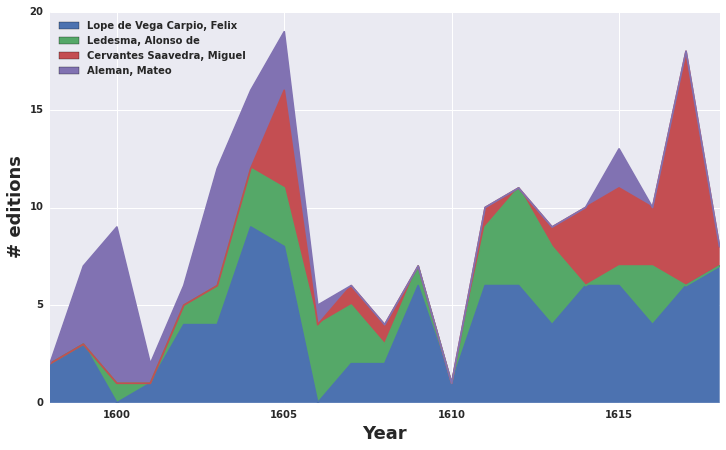

In [22]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
author_by_year = df.groupby(["Author", "Year"]).size()
other = author_by_year.drop(["Lope de Vega Carpio, Fenix", "Ledesma, Alonso de",
                             "Cervantes Saavedra, Miguel", "Aleman, Mateo"], axis=0)
other = other.unstack().fillna(0).sum()
top_authors_year = pd.DataFrame(
    {"Aleman, Mateo": author_by_year.ix["Aleman, Mateo"],
     "Cervantes Saavedra, Miguel": author_by_year.ix["Cervantes Saavedra, Miguel"],
     "Ledesma, Alonso de": author_by_year.ix["Ledesma, Alonso de"],
     "Lope de Vega Carpio, Felix": author_by_year.ix["Lope de Vega Carpio, Fenix"]
     }, columns=["Lope de Vega Carpio, Felix", "Ledesma, Alonso de", "Cervantes Saavedra, Miguel", "Aleman, Mateo"]).fillna(0)
top_authors_year.plot(kind="area")
plt.ylabel('# editions', weight='bold', size=18)
plt.xlabel('Year', weight='bold', size=18)
plt.savefig("img/article/figure8.eps", format='eps', dpi=1000)

In [23]:
author_by_year["Ledesma, Alonso de"].divide(years)

Year
1598         NaN
1599         NaN
1600    0.111111
1601         NaN
1602    0.100000
1603    0.111111
1604    0.150000
1605    0.120000
1606    0.800000
1607    0.333333
1608    0.125000
1609    0.071429
1610         NaN
1611    0.214286
1612    0.333333
1613    0.307692
1614         NaN
1615    0.052632
1616    0.176471
1617         NaN
1618         NaN
dtype: float64

(0, 1.0)

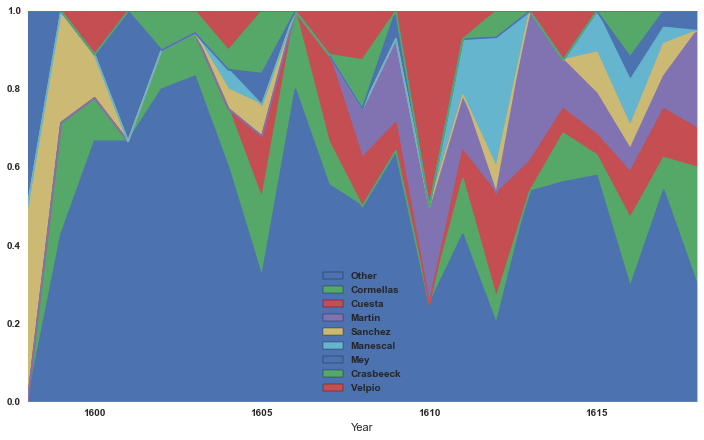

In [24]:
printers_by_year = df.groupby(["Printer", "Year"]).size()
other = printers_by_year.drop(["Cormellas", "Cuesta", "Martin", "Sanchez", "Manescal", "Mey", "Crasbeeck", "Velpio"], axis=0)
other = other.unstack().fillna(0).sum()
years = df.groupby("Year").size()
top_printer_year = pd.DataFrame(
    {"Other": other.divide(years),
     "Cormellas": printers_by_year.ix["Cormellas"].divide(years),
     "Cuesta": printers_by_year.ix["Cuesta"].divide(years),
     "Martin": printers_by_year.ix["Martin"].divide(years),
     "Sanchez": printers_by_year.ix["Sanchez"].divide(years),
     "Manescal": printers_by_year.ix["Manescal"].divide(years),
     "Mey": printers_by_year.ix["Mey"].divide(years),
     "Crasbeeck": printers_by_year.ix["Crasbeeck"].divide(years),
     "Velpio": printers_by_year.ix["Velpio"].divide(years)
    }, columns=["Other", "Cormellas", "Cuesta", "Martin", "Sanchez", "Manescal", "Mey", "Crasbeeck", "Velpio"]).fillna(0)
sns.set_style("dark")
top_printer_year.plot(kind="area")
plt.ylim(0, 1.0)

In [25]:
printers_by_place = df[["Place of Publication", "Printer", ]].groupby("Place of Publication").Printer.nunique()

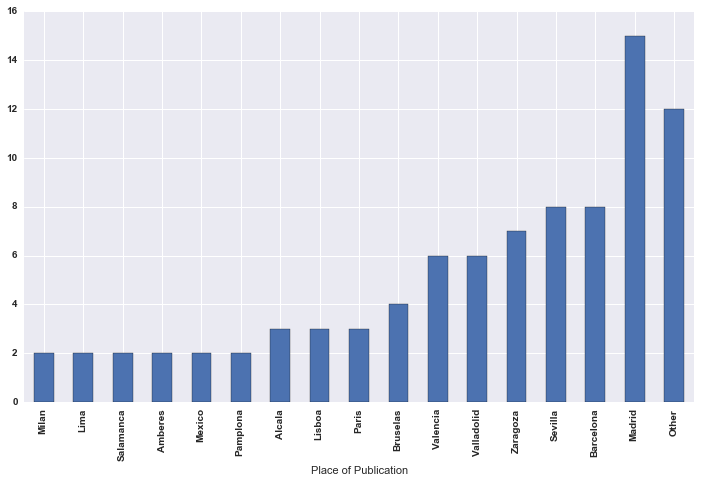

In [26]:
printers_by_place.sort()
upper = printers_by_place[printers_by_place > 1]
lower = printers_by_place[printers_by_place == 1]
upper["Other"] = lower.sum()
upper.plot("bar")
plt.savefig("img/printers_per_city.png")

In [27]:
printers_by_place
write_csv(printers_by_place.to_dict(), map_key, 'maps/western_europe_data/tsv/printers.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'maps/western_europe_data/tsv/printers.csv'

In [28]:
editions_by_printers = pd.concat([printers_by_place, places], axis=1)
editions_by_printers = editions_by_printers.sort(columns=[1,0])
editions_by_printers

,0,1
Bruselas/Amberes,1,1
Burgos,1,1
Coimbra,1,1
Cordoba,1,1
Lyon,1,1
Malaga,1,1
Medina,1,1
Roma,1,1
Venetia,1,1
Tarragona,1,2


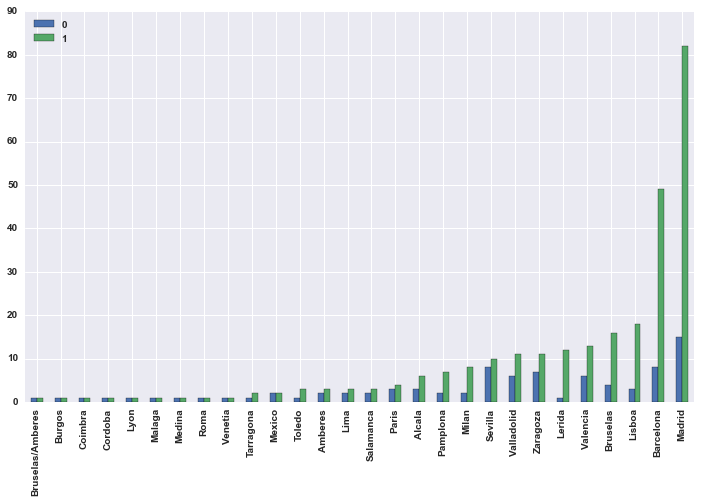

In [29]:
editions_by_printers.plot(kind="bar")

In [30]:
editions_by_printers.columns = ["printer", "editions"]
len(editions_by_printers)

28

In [33]:
plt.rcParams['figure.figsize'] = 17, 7
sns.lmplot("printer", "editions", editions_by_printers, x_jitter=0.155, color="seagreen")
plt.ylabel('# editions', weight='bold', size=18)
plt.xlabel('# printers', weight='bold', size=18)
plt.savefig("img/article/reg.eps", format='eps', dpi=1000)

TypeError: lmplot() got an unexpected keyword argument 'color'

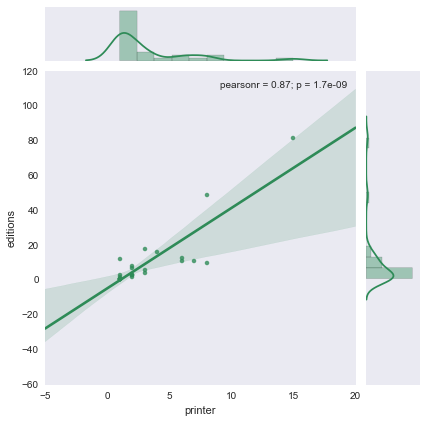

In [47]:
sns.jointplot("printer", "editions", editions_by_printers, kind="reg", color="seagreen")